In [78]:
%%file /tmp/image.lean

def image (i j : Nat) := 
    if (i-200)^2 + (j-200)^2 < 100^2 then 1 else 0

Overwriting /tmp/image.lean


In [1]:
import leancall as lc
mod = lc.from_file("/tmp/image.lean")

Lake version 5.0.0-src+db93fe1 (Lean version 4.27.0)
Build completed successfully (26 jobs).


In [4]:
! cp ./ray.lean /tmp/ray.lean

In [23]:
%%file /tmp/ray.lean

abbrev Image := Array (Array (Array UInt8))
partial def doit (N : Nat) := Id.run do
  let mut img : Image := Array.replicate N (Array.replicate N #[0, 0, 0])
  for i in [0:N] do
    for j in [0:N] do
          if ((i : Int)- N/2)^2 + ((j : Int) - N/2)^2 < (N/4)^2 -- This Int conversion sucks. But I'd have a similar problem in many other languages
          then
            --let newrow := (img[i]!).set! j (0, 0, 255)
            img := img.modify i fun row => row.set! j #[0, 0, 255]
            --img.set! i newrow
  return img

Overwriting /tmp/ray.lean


In [1]:
import leancall as lc
mod = lc.from_file("/tmp/ray.lean")


Lake version 5.0.0-src+db93fe1 (Lean version 4.27.0)
Build completed successfully (26 jobs).


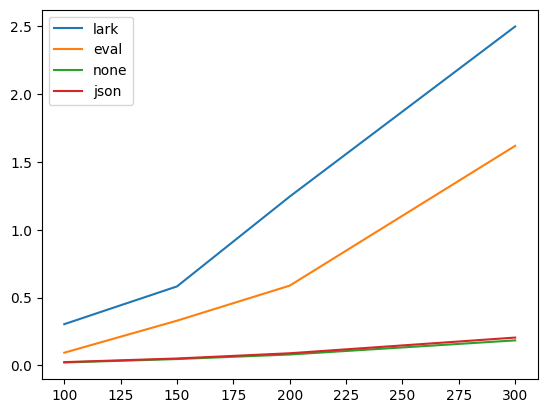

In [ ]:
import matplotlib.pyplot as plt
import time
none = []
lark = []
ev = []
js = []
Ns = [100, 150, 200, 300]
for N in Ns:
    start = time.time()
    img = mod.doit(N)
    lark.append(time.time() - start)
    start = time.time()
    img = mod.doit(N, parse="eval")
    ev.append(time.time() - start)
    start = time.time()
    img = mod.doit(N, parse=None)
    none.append(time.time() - start)
    start = time.time()
    img = mod.doit(N, parse="json")
    js.append(time.time() - start)
plt.plot(Ns, lark, label="lark")
plt.plot(Ns, ev, label="eval")
plt.plot(Ns, none, label="none")
plt.plot(Ns, js, label="json")
plt.legend()
# The json line on this plot is faulty somehow?

In [ ]:
img = mod.doit(500) # 7s

In [29]:
img = mod.doit(500, parse=None) # 0.5s

In [ ]:
img = mod.doit(500, parse="eval") # 4s

In [31]:
img = mod.doit(500, parse="json") #4s
img

[[[0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],

In [64]:
import numpy as np
from io import StringIO   # StringIO behaves like a file object

trans_table = str.maketrans("#,[()]\n", "       ")
def numpy_parse(s: str) -> np.ndarray:
    #print(s.translate(trans_table))
    #return np.fromstring(s.translate(trans_table))
    return np.loadtxt(StringIO(s.translate(trans_table)))

N = 800
img = numpy_parse(mod.doit(N, parse=None))
img

array([0., 0., 0., ..., 0., 0., 0.], shape=(1920000,))

In [9]:
import json
json.loads("[[(1,2,3), (4,5,6)], [(7,8,9), (10,11,12)]]")

JSONDecodeError: Expecting value: line 1 column 3 (char 2)

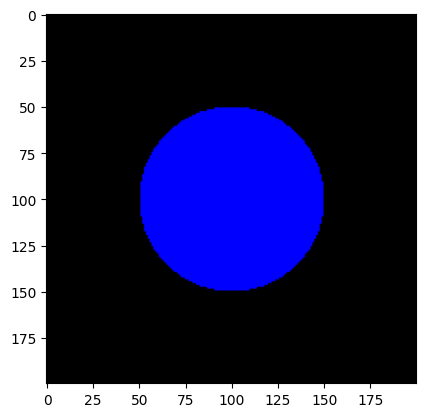

         9277304 function calls (9277054 primitive calls) in 2.541 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      2/1    0.000    0.000    2.541    2.541 {built-in method builtins.exec}
      2/1    0.001    0.000    2.541    2.541 <string>:1(<module>)
      2/1    0.000    0.000    2.524    2.524 leanfun.py:285(__call__)
        1    0.000    0.000    2.447    2.447 leanfun.py:249(from_lean)
        1    0.000    0.000    2.447    2.447 leanfun.py:131(parse_lean_value)
        1    0.000    0.000    2.447    2.447 lark.py:654(parse)
        1    0.000    0.000    2.447    2.447 parser_frontends.py:123(parse)
        1    0.000    0.000    2.447    2.447 lalr_parser.py:40(parse)
        1    0.000    0.000    2.447    2.447 lalr_parser.py:83(parse)
        1    0.092    0.092    2.447    2.447 lalr_parser.py:91(parse_from_state)
   320402    0.108    0.000    1.381    0.000 lexer.py:685(lex)
   320402    0.341    0

In [12]:
%%prun -s cumulative
import matplotlib.pyplot as plt
plt.imshow(mod.doit(200))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


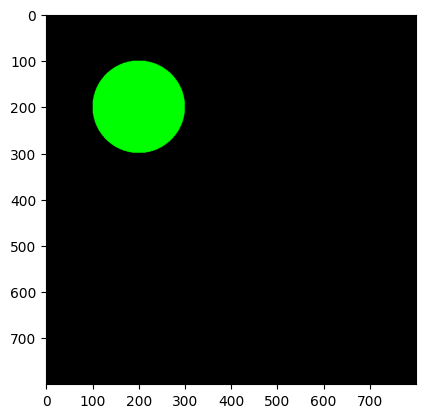

In [67]:
import numpy as np
from IPython.display import Image

img = np.zeros((800,800,3))

for i in range(800):
    for j in range(800):
        if (i-200)**2 + (j-200)**2 < 100**2:
            img[i,j] = [0,255,0] #img[i,j] = [0, mod.image(i,j), 0] #

import matplotlib.pyplot as plt

plt.imshow(img)

Rendering row 0/16
Rendering row 1/16/16
Rendering row 2/16/16
Rendering row 3/16/16
Rendering row 4/16/16
Rendering row 5/16/16
Rendering row 6/16/16
Rendering row 7/16/16
Rendering row 8/16/16
Rendering row 9/16/16
Rendering row 10/1616
Rendering row 11/1616
Rendering row 12/1616
Rendering row 13/1616
Rendering row 14/1616
Rendering row 15/1616


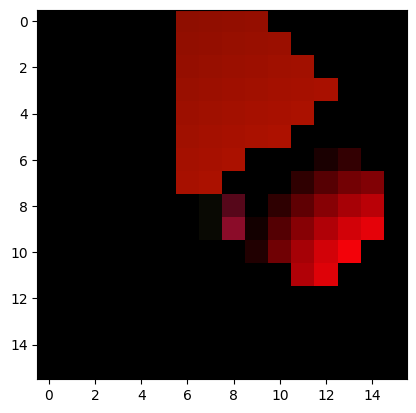

In [76]:
from dataclasses import dataclass
from typing import Optional
from numba import jit
img = np.zeros((400,400,3))

@dataclass
class Ray:
    origin : np.array
    direction : np.array

@dataclass
class Sphere:
    x : float
    y : float
    z : float
    radius : float
    color : np.array
    def intersect(self, ray : Ray) -> Optional[tuple[float, np.array]]:
        # Ray-sphere intersection
        oc = ray.origin - np.array([self.x, self.y, self.z])
        a = np.dot(ray.direction, ray.direction)
        b = 2.0 * np.dot(oc, ray.direction)
        c = np.dot(oc, oc) - self.radius * self.radius
        discriminant = b * b - 4 * a * c
        if discriminant < 0:
            return None
        else:
            t = (-b - np.sqrt(discriminant)) / (2.0 * a)
            if t > 0:
                pos = ray.origin + t * ray.direction
                norm = (pos - np.array([self.x, self.y, self.z])) / self.radius
                return (t, norm)
            else:
                return None

@dataclass
class Triangle:
    v0 : np.array
    v1 : np.array
    v2 : np.array
    color : np.array
    def intersect(self, ray : Ray) -> Optional[tuple[float, np.array]]:
        # Möller–Trumbore intersection algorithm
        epsilon = 1e-8
        edge1 = self.v1 - self.v0
        edge2 = self.v2 - self.v0
        h = np.cross(ray.direction, edge2)
        a = np.dot(edge1, h)
        if -epsilon < a < epsilon:
            return None  # Ray is parallel to triangle
        f = 1.0 / a
        s = ray.origin - self.v0
        u = f * np.dot(s, h)
        if u < 0.0 or u > 1.0:
            return None
        q = np.cross(s, edge1)
        v = f * np.dot(ray.direction, q)
        if v < 0.0 or u + v > 1.0:
            return None
        t = f * np.dot(edge2, q)
        if t > epsilon:
            norm = np.cross(edge1, edge2)
            norm = norm / np.linalg.norm(norm)
            return (t, norm)
        else:
            return None
@dataclass
class Mesh:
    vertices : np.array
    faces : np.array
    color : np.array
    def intersect(self, ray : Ray) -> Optional[tuple[float, np.array]]:
        min_t = float('inf')
        hit_norm = None
        for face in self.faces:
            v0 = self.vertices[face[0]]
            v1 = self.vertices[face[1]]
            v2 = self.vertices[face[2]]
            triangle = Triangle(v0, v1, v2, self.color)
            tnorm = triangle.intersect(ray)
            if tnorm is not None:
                t, norm = tnorm
                if t < min_t:
                    min_t = t
                    hit_norm = norm
        if hit_norm is not None:
            return (min_t, hit_norm)
        else:
            return None


@dataclass
class Light:
    position : np.array
    color : np.array

lights : list[Light] = [Light(np.array([50,50,0]), np.array([1,0.1,0.4])),]
                       # Light(np.array([-50,50,0]), np.array([0.1,1,0.4]))]

objects = [Sphere(0,10,50,10,np.array([1,0.1,0.1])),
           Sphere(0,0,100,10,np.array([0.1,1,0.1])),
           Sphere(-20,0,100,10,np.array([0.1,0.1,1])),
           Triangle(np.array([-50,-10,70]), np.array([-20,20,70]), np.array([0,-10,70]), np.array([1,1,0])),
           Mesh(mesh.vertices + np.array([0,0,30]), mesh.faces[10:], np.array([0.8,0.7,0.6]) )
           ]

def doit():
    N = 16
    img = np.zeros((N,N,3))
    for i in range(N):
        print(f"Rendering row {i}/{N}")
        for j in range(N):
            print(f"Rendering pixel {j}/{N}", end='\r')
            ray = Ray(np.zeros(3), np.array([(i-N//2)/N, (j-N//2)/N, 1]))
            min_t = float('inf')
            for obj in objects:
                tnorm = obj.intersect(ray)
                if tnorm is not None:
                    t, norm = tnorm
                    if t < min_t:
                        min_t = t
                        pixel = np.zeros(3)
                        for light in lights:
                            # Simple diffuse shading
                            light_dir = light.position - (ray.origin + t * ray.direction)
                            light_dir = light_dir / np.linalg.norm(light_dir)
                            diff = max(np.dot(norm, light_dir), 0)
                            pixel += obj.color * light.color * diff
                        img[i,j] = pixel
    return img

import matplotlib.pyplot as plt
img = doit()
plt.imshow(img)

In [72]:
img

In [52]:
import trimesh

# Load the GLB file
# The result will be a Scene object if the file has a scene graph, 
# or a Mesh object if it contains a single mesh
scene_or_mesh = trimesh.load('~/Downloads/dog_base_mesh.glb')

# If it's a Scene object, you can access the individual meshes
if isinstance(scene_or_mesh, trimesh.Scene):
    for mesh in scene_or_mesh.geometry.values():
        print(mesh.vertices)
        print(mesh.faces)


[[-3.28274250e+00 -1.84968993e-01  9.39643800e-01]
 [-3.30871415e+00 -1.85230285e-01  1.00396633e+00]
 [-3.36427331e+00 -9.73236784e-02  9.90748227e-01]
 ...
 [ 3.77423024e+00 -4.28468324e-02  1.63269484e+00]
 [ 3.79892397e+00 -2.06801426e-02  1.62660873e+00]
 [ 3.80888247e+00 -7.63056451e-04  1.61279178e+00]]
[[   0    1    2]
 [   0    2    3]
 [   1    4    5]
 ...
 [5196 5182 5192]
 [5195 5196 5192]
 [5195 5192 5190]]


In [47]:
import open3d as o3d
import os

filename = "~/Downloads/DogBase<esh.fbx"
if os.path.exists(filename):
    # The function calls the appropriate reader based on file extension
    mesh = o3d.t.io.read_triangle_mesh(filename)
    # You can now access mesh properties, e.g., vertices and triangles
    print(f"Vertices: {mesh.get_vertex_positions().numpy().shape}")
    print(f"Triangles: {mesh.get_triangle_indices().numpy().shape}")
else:
    print(f"Error: File not found at {filename}")

ModuleNotFoundError: No module named 'open3d'

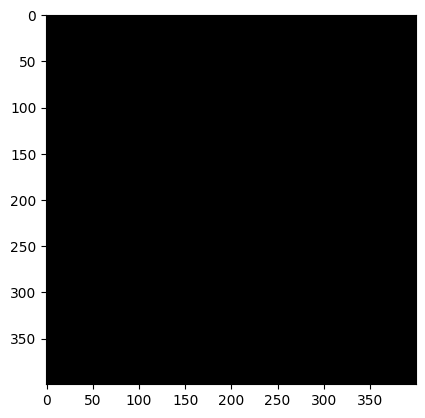